# Polar Code Design
This Jupyter notebook demonstrates how to use [Polar.jl](https://github.com/jneu-research/Polar.jl) to design polar codes.
In the following, the target is: blocklength $n=128$ (corresponding to $m=7$ polarization steps), dimension $k=64$ (corresponding to rate $R=1/2$), binary-input additive white Gaussian noise (BIAWGN) channel at design signal-to-noise ratio $E_\text{b}/N_\text{0} = 3.0\,\text{dB}$.

Two design methods are employed: as Reed-Muller code (see: *M. Mondelli, S. H. Hassani, and R. L. Urbanke. ''From Polar to Reed-Muller Codes: A Technique to Improve the Finite-Length Performance''. In: IEEE Trans. Commun. (2014).*) and using density evolution (see: *R. Mori and T. Tanaka. ''Performance and Construction of Polar Codes on Symmetric Binary-Input Memoryless Channels''. In: Proc. IEEE Int. Symp. Inf. Theory (ISIT). 2009.*).
Note that Reed-Muller codes exist only for specific combinations of $m$ and $k$, for more information see [Wikipedia: Reed-Muller code](https://en.wikipedia.org/wiki/Reed%E2%80%93Muller_code).

## Preparations
Activate project-local Julia environment and load plots library

In [1]:
using Pkg
Pkg.activate(".")

using Plots
pyplot()

Plots.PyPlotBackend()

Load required parts of Polar.jl

In [2]:
# using Revise
using Polar.Design: design_reedmuller, design_densityevolution
using Polar.Visualizations: plot_code, plot_codecomparison, plot_errorprobability_annotated, plot_mutualinformation_annotated
using Polar.CommunicationsUtils: ebn0db2σ²
using Polar.Channels: BiAWGNChannel
using Polar.BridgeCh2DE: channeloutputdistribution
using Polar.DensityEvolution: densityevolution

┌ Warning: Package Polar does not have Plots in its dependencies:
│ - If you have Polar checked out for development and have
│   added Plots as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with Polar
│ Loading Plots into Polar from project dependency, future warnings for Polar are suppressed.
└ @ nothing nothing:840


Set design parameters

In [3]:
m = 7
k = 64
EbN0dB_design = 3.0

3.0

## Design Reed-Muller code
Reed-Muller codes are good for successive cancellation list decoding

In [4]:
frozen_vector_rm = design_reedmuller(m, k);

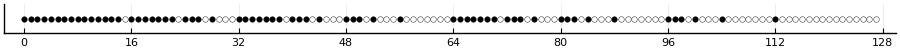

In [5]:
plot_code(frozen_vector_rm)

## Design using density evolution
Codes designed using density evolution perform well under successive cancellation decoding

In [6]:
σ²_design = ebn0db2σ²(EbN0dB_design, k/2^m)
channel = BiAWGNChannel(σ²_design)
distribution = channeloutputdistribution(channel)
frozen_vector_de = design_densityevolution(m, k, distribution);

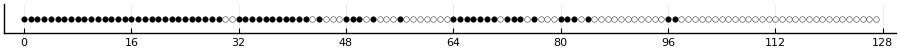

In [7]:
plot_code(frozen_vector_de)

## Code comparison

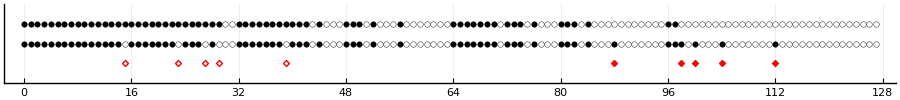

In [8]:
@assert frozen_vector_rm == Bool[true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, false, true, true, true, true, true, true, true, false, true, true, true, false, true, false, false, false, true, true, true, true, true, true, true, false, true, true, true, false, true, false, false, false, true, true, true, false, true, false, false, false, true, false, false, false, false, false, false, false, true, true, true, true, true, true, true, false, true, true, true, false, true, false, false, false, true, true, true, false, true, false, false, false, true, false, false, false, false, false, false, false, true, true, true, false, true, false, false, false, true, false, false, false, false, false, false, false, true, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false]
@assert frozen_vector_de == Bool[true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, false, false, true, true, true, true, true, true, true, true, true, true, true, false, true, false, false, false, true, true, true, false, true, false, false, false, true, false, false, false, false, false, false, false, true, true, true, true, true, true, true, false, true, true, true, false, true, false, false, false, true, true, true, false, true, false, false, false, false, false, false, false, false, false, false, false, true, true, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false]
plot_codecomparison(frozen_vector_de, frozen_vector_rm)

## Plot error probability and mutual information of bits

In [9]:
densityevolution_result = densityevolution(m, distribution);

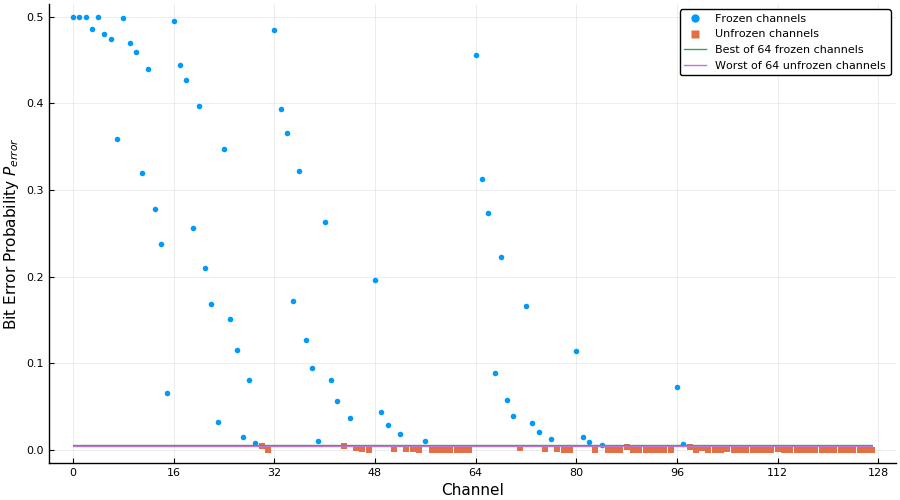

In [10]:
plot_errorprobability_annotated(densityevolution_result, frozen_vector_de)

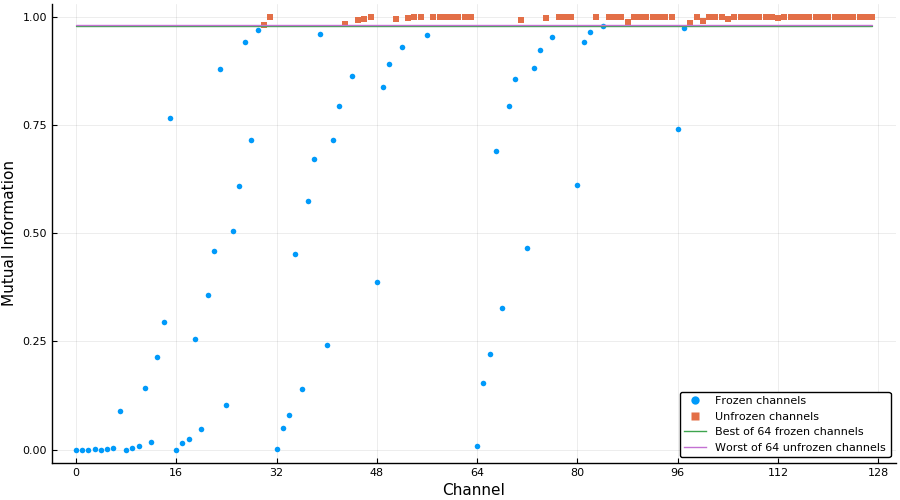

In [11]:
plot_mutualinformation_annotated(densityevolution_result, frozen_vector_de)

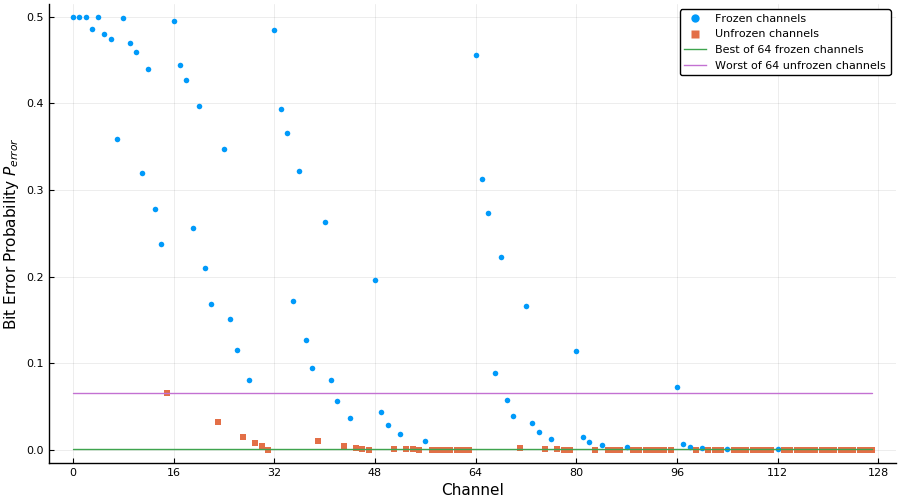

In [12]:
plot_errorprobability_annotated(densityevolution_result, frozen_vector_rm)

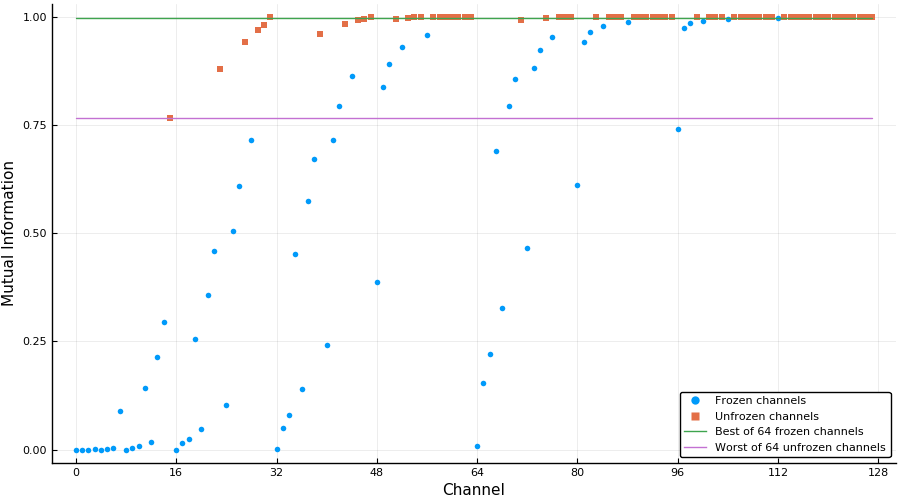

In [13]:
plot_mutualinformation_annotated(densityevolution_result, frozen_vector_rm)